# Matplotlib Subplot - A Helpful Illustrated Guide


To create a matplotlib subplot with any number of rows and columns, use the `plt.subplot()` function. 

It takes 3 arguments, all of which are integers and positional only i.e. you cannot use keywords to specify them.

```python
plt.subplot(nrows, ncols, index)
```

* `nrows` - the number of rows 
* `ncols` - the number of columns
* `index` - the `Subplot` you want to select (starting from 1 in the top left)


So, `plt.subplot(3, 1, 1)` has 3 rows, 1 column (a 3 x 1 grid) and selects `Subplot` with index 1. 

After `plt.subplot()`, code your plot as normal using the `plt.` functions you know and love. Then, select the next subplot by increasing the index by 1 - `plt.subplot(3, 1, 2)` selects the second `Subplot` in a 3 x 1 grid. Once all `Subplots` have been plotted, call `plt.tight_layout()` to ensure no parts of the plots overlap. Finally, call `plt.show()` to display your plot.

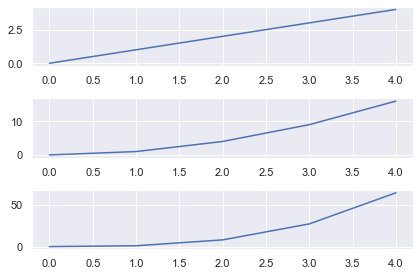

In [1]:
# Import necessary modules and (optionally) set Seaborn style
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# Generate data to plot
linear = [x for x in range(5)]
square = [x**2 for x in range(5)]
cube = [x**3 for x in range(5)]

# 3x1 grid, first subplot
plt.subplot(3, 1, 1)
plt.plot(linear)

# 3x1 grid, second subplot
plt.subplot(3, 1, 2)
plt.plot(square)

# 3x1 grid, third subplot
plt.subplot(3, 1, 3)
plt.plot(cube)

plt.tight_layout()
plt.show()

## Matplotlib Subplot Example

The arguments for `plt.subplot()` are intuitive:

```
plt.subplot(nrows, ncols, index)
```

The first two - nrows and ncols - stand for the number of rows and number of columns respectively. 

If you want a 2x2 grid, set nrows=2 and ncols=2. For a 3x1 grid, it’s nrows=3 and ncols=1. 

The index is the subplot you want to select. The code you write immediately after it is drawn on that subplot. Unlike everything else in the Python universe, indexing starts from 1, not 0. It continues from left-to-right in the same way you read.

So, for a 2 x 2 grid, the indexes are

<div>
    <img src="Figures/2x2_vals.png" width="400" align="left"/>
</div>

For a 3 x 1 grid, they are

<div>
    <img src="Figures/3x1_vals.png" width="400" align="left"/>
</div>

The arguments for `plt.subplot()` are positional only. You cannot pass them as keyword arguments.

```python
>>> plt.subplot(nrows=3, ncols=1, index=1)
AttributeError: 'AxesSubplot' object has no property 'nrows'
```

However, the comma between the values is optional, if each value is an integer less than 10. 

Thus, the following are equivalent - they both select index 1 from a 3x1 grid.

```python
plt.subplot(3, 1, 1)
plt.subplot(311)
```

I will alternate between including and excluding commas to aid your learning.

Let's look at the default subplot layout and the general outline for your code.

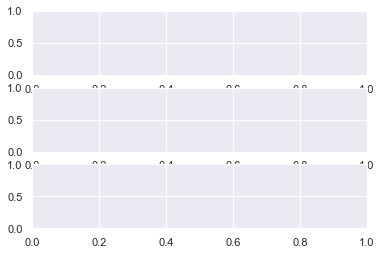

In [2]:
plt.subplot(3, 1, 1)
# First subplot here

plt.subplot(3, 1, 2)
# Second subplot here

plt.subplot(3, 1, 3)
# Third subplot here

plt.show()

This looks ok but the x-axis labels are hard to read on the top 2 subplots. 

You have a few ways to solve this problem.

First, you can manually adjust the xticks with the [matplotlib xticks](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html) function - `plt.xticks()` - and either:
1. make them transparent by setting `alpha=0`, or
2. move them and decrease their font size with the `position` and `size` arguments

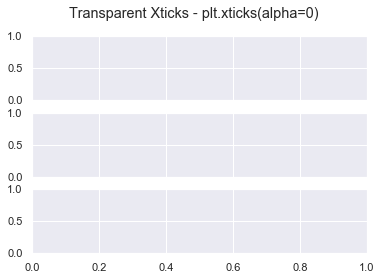

In [3]:
# Make xticks of top 2 subplots transparent
plt.subplot(3, 1, 1)
plt.xticks(alpha=0)

plt.subplot(3, 1, 2)
plt.xticks(alpha=0)

# Plot nothing on final subplot
plt.subplot(3, 1, 3)

plt.suptitle('Transparent Xticks - plt.xticks(alpha=0)')
plt.show()

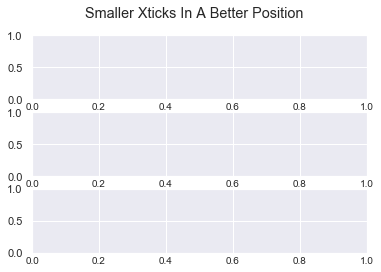

In [4]:
# Move and decrease size of xticks on all subplots
plt.subplot(3, 1, 1)
plt.xticks(position=(0, 0.1), size=10)

plt.subplot(3, 1, 2)
plt.xticks(position=(0, 0.1), size=10)

plt.subplot(3, 1, 3)
plt.xticks(position=(0, 0.1), size=10)

plt.suptitle('Smaller Xticks In A Better Position')
plt.show()

Both these methods work but are fiddly. Plus, you cannot automate them which is annoying for us programmers. 

You have this ticks problem whenever you create subplots. Thankfully, the [matplotlib tight_layout](https://matplotlib.org/3.1.0/api/tight_layout_api.html) function was created to solve this. 

## Matplotlib Tight_Layout

By calling  `plt.tight_layout()`, matplotlib automatically adjusts the following parts of the plot to make sure they don't overlap:
1. axis labels set with `plt.xlabel()` and `plt.ylabel()`,
2. tick labels set with `plt.xticks()` and `plt.yticks()`,
3. titles set with `plt.title()` and `plt.suptitle()`

Note that this feature is experimental. It's not perfect but often does a really good job. Also, note that it does not work too well with legends or colorbars - you'll see how to work with them later. 

Let's see the most basic example without any labels or titles. 

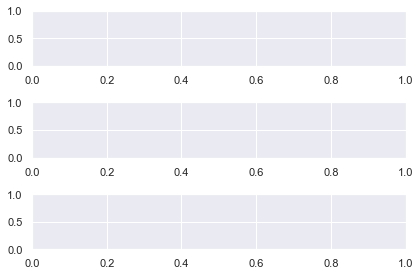

In [6]:
plt.subplot(311)
plt.subplot(312)
plt.subplot(313)
plt.tight_layout()
plt.show()

Now there is plenty of space between the plots. You can adjust this with the `pad` keyword. It accepts a float in the range [0.0, 1.0] and is a fraction of the font size. 

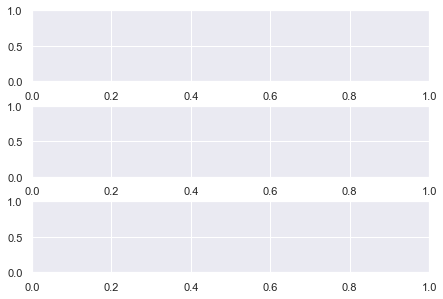

In [6]:
plt.subplot(311)
plt.subplot(312)
plt.subplot(313)
plt.tight_layout(pad=0.1)
plt.show()

Now there is less space between the plots but everything is still readable. I use `plt.tight_layout()` in every single plot (without colobars or legends) and I recommend you do as well. It's an easy way to make your plots look great. 

Check out the docs more information and arguments that [tight_layout in matplotlib](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.tight_layout.html) accepts.

Now, let's look at how to add more info to our subplots in matplotib.

## Matplotlib Subplot Title

You can add a title to each subplot with the `plt.title()` function. 

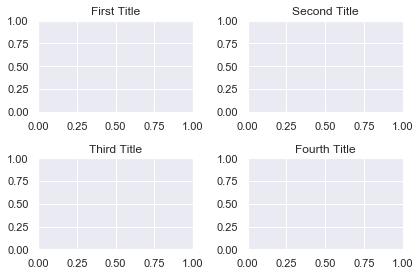

In [7]:
plt.subplot(2, 2, 1)
plt.title('First Title')

plt.subplot(2, 2, 2)
plt.title('Second Title')

plt.subplot(2, 2, 3)
plt.title('Third Title')

plt.subplot(2, 2, 4)
plt.title('Fourth Title')

plt.tight_layout()
plt.show()

## Matplotlib Subplot Overall Title

Add an overall title to a subplot in matplotlib with the `plt.suptitle()` function (it stands for 'super title').

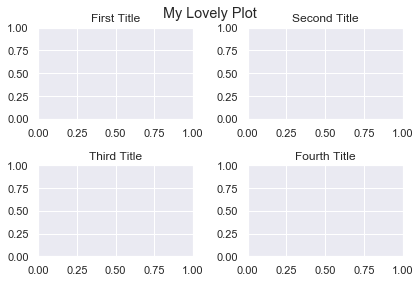

In [8]:
# Same plot as above
plt.subplot(2, 2, 1)
plt.title('First Title')

plt.subplot(2, 2, 2)
plt.title('Second Title')

plt.subplot(2, 2, 3)
plt.title('Third Title')

plt.subplot(2, 2, 4)
plt.title('Fourth Title')

# Add overall title to the plot
plt.suptitle('My Lovely Plot')
plt.tight_layout()
plt.show()

## Matplotlib Subplot Height

To change the height of a subplot in matplotlib, see the next section.

## Matplotlib Subplot Size 

You have total control over the size of subplots in matplotlib.

You can either change the size of the entire `Figure` or the size of the `Subplots` themselves. 

Let's look at changing the `Figure`.

### Matplotlib Figure Size

First off, what is the `Figure`? To quote the [AnatomyOfMatplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib):

> It is the overall window/page that everything is drawn on.  You can have multiple independent figures and ``Figures`` can contain multiple ``Subplots``

In other words, the `Figure` is the blank canvas you 'paint' all your plots on.

If you are happy with the size of your subplots but you want the final image to be larger/smaller, change the `Figure`. Do this at the top of your code with the [matplotlib figure](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.figure.html) function - `plt.figure()`.

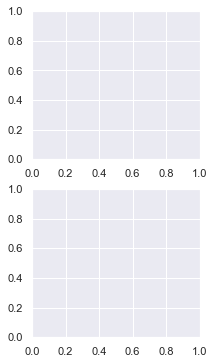

In [8]:
# Make Figure 3 inches wide and 6 inches long
plt.figure(figsize=(3, 6))

# Create 2x1 grid of subplots
plt.subplot(211)
plt.subplot(212)
plt.show()

Before coding any subplots, call `plt.figure()` and specify the `Figure` size with the `figsize` argument. It accepts a tuple of 2 numbers - `(width, height)` of the image in inches. 

Above, I created a plot 3 inches wide and 6 inches long - `plt.figure(figsize=(3, 6))`.

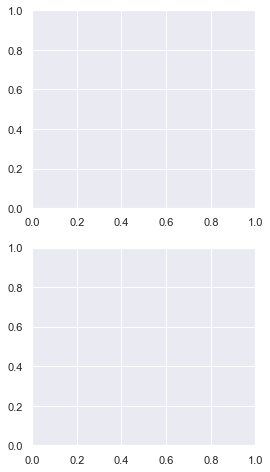

In [10]:
# Make a Figure twice as long as it is wide
plt.figure(figsize=plt.figaspect(2))

# Create 2x1 grid of subplots
plt.subplot(211)
plt.subplot(212)
plt.show()

You can set a more general `Figure` size with the [matplotlib figaspect](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.figure.figaspect.html) function. It lets you set the aspect ratio (height/width) of the `Figure`. 

Above, I created a `Figure` twice as long as it is wide by setting `figsize=plt.figaspect(2)`.

Note: Remember the aspect ratio (height/width) formula by recalling that `height` comes first in the alphabet.

Now let's look at putting different sized `Subplots` on one `Figure`.

### Matplotlib Subplots Different Sizes

The hardest part of creating a `Figure` with different sized `Subplots` in matplotlib is figuring out what fraction each `Subplot` takes up.

So, you should know what you are aiming for before you start. You could sketch it on paper or draw shapes in PowerPoint. Once you've done this, everything else is much easier.

I'm going to create this shape

<div>
<img src="Figures/labelled_subplot.png" width=400 align="left" />
</div>

I've labeled the fraction each `Subplot` takes up as we need this for our `plt.subplot()` calls. 

I'll create the biggest subplot first and the others in descending order.

<div>
<img src="Figures/2s.png" width=400 align="left" />
</div>

The right-hand side is half of the plot. It is one of two plots on a `Figure` with 1 row and 2 columns. To select it with `plt.subplot()`, you need to set `index=2`. 

Note that in the image, the blue numbers are the index values each `Subplot` has.

In code, this is

```python
plt.subplot(122)
```

<div>
<img src="Figures/4s.png" width=400 align="left" />
</div>

Now, select the bottom left `Subplot` in a a 2x2 grid i.e. `index=3`

```python
plt.subplot(223)
```

<div>
<img src="Figures/8s.png" width=400 align="left" />
</div>

Lastly, select the top two `Subplots` on the left-hand side of a 4x2 grid i.e. `index=1` and `index=3`.

```python
plt.subplot(421)
plt.subplot(423)
```

When you put this altogether you get

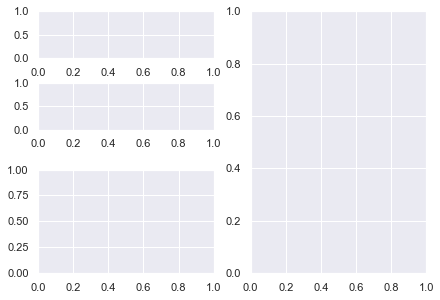

In [12]:
# Subplots you have just figured out
plt.subplot(122)
plt.subplot(223)
plt.subplot(421)
plt.subplot(423)

plt.tight_layout(pad=0.1)
plt.show()

Perfect! Breaking the `Subplots` down into their individual parts and knowing the shape you want makes everything easier. 

### Matplotlib Subplot Size Different

You may have noticed that each of the `Subplots` in the previous example took up `1/x` fraction of space - `1/2`, `1/4` and `1/8`. 

With the matplotlib subplot function, you can *only* create `Subplots` that are `1/x`.

<div>
    <img src="Figures/subplot_thirds.png" width="400" align="left" />
</div>

It is not possible to create the above plot in matplotlib using the `plt.subplot()` function. However, if you use the [matplotlib subplots](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.subplots.html) function or [GridSpec](https://matplotlib.org/api/_as_gen/matplotlib.gridspec.GridSpec.html#matplotlib.gridspec.GridSpec), then it can be done. 

## Matplotlib Subplots_Adjust

If you aren't happy with the spacing between plots that `plt.tight_layout()` provides, manually adjust it with `plt.subplots_adjust()`.

It takes 6 optional, self-explanatory keyword arguments. Each accepts a float in the range [0.0, 1.0] and they are a fraction of the font size:
* `left`, `right`, `bottom` and `top` is the spacing on each side of the `Subplot`
* `wspace` - the **width** between `Subplots`
* `hspace` - the **height** between `Subplots`

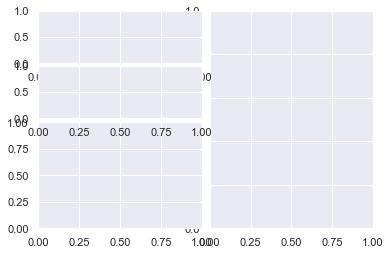

In [15]:
# Same grid as above
plt.subplot(122)
plt.subplot(223)
plt.subplot(421)
plt.subplot(423)

# Set horizontal and vertical space to 0.05
plt.subplots_adjust(hspace=0.05, wspace=0.05)
plt.show()

In this example, I decreased both the height and width to just `0.05`. Now there is hardly any space between the plots. 

To avoid loads of similar examples, play around with the arguments yourself to get a feel for how this function works. 

## Matplotlib Suplot DPI

The Dots Per Inch (DPI) is a measure of printer resolution. It is the number of colored dots placed on each square inch of paper when it's printed. The more dots you have, the higher the quality of the image. If you are going to print your plot on a large poster, it's a good idea to use a large DPI.

The DPI for each `Figure` is controlled by the `plt.rcParams` dictionary. It contains all the *runtime configuration* settings. If you print `plt.rcParams` to the screen, you will see all the variables you can modify. We want `figure.dpi`.

Let's make a simple line plot first with the default DPI (72.0) and then a much smaller value.

The default DPI in matplotlib is 72.0


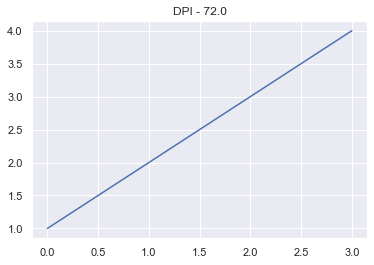

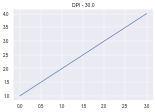

In [13]:
# Print default DPI
print(f"The default DPI in matplotlib is {plt.rcParams['figure.dpi']}")

# Default DPI
plt.plot([1, 2, 3, 4])
plt.title('DPI - 72.0')
plt.show()

# Smaller DPI
plt.rcParams['figure.dpi'] = 30.0
plt.plot([1, 2, 3, 4])
plt.title('DPI - 30.0')
plt.show()

# Change DPI back to 72.0
plt.rcParams['figure.dpi'] = 72.0

The `Figure` with a smaller DPI is smaller and has a lower resolution. 

If you want to permanently change the DPI of all matplotlib `Figures` - or any of the runtime configuration settings - find the `matplotlibrc` file on your system and modify it. 

You can find it by entering
```python
import matplotlib as mpl
mpl.matplotlib_fname()
```

Once you have found it, there are notes inside telling you what everything does. 

## Matplotlib Subplot Spacing

The function `plt.tight_layout()` solves most of your spacing issues. If that is not enough, call it with the optional `pad` and pass a float in the range [0.0, 1.0]. If that still is not enough, use the `plt.subplots_adjust()` function. 

I've explained both of these functions in detail further up the article. 

## Matplotlib Subplot Colorbar

Adding a colorbar to each plot is the same as adding a title - code it underneath the `plt.subplot()` call you are currently working on. Let's plot a 1x2 grid where each `Subplot` is a heatmap of randomly generated numbers. 

For more info on the [Python random module](https://blog.finxter.com/python-random-module/), check out my article. I use the Numpy random module below but the same ideas apply.


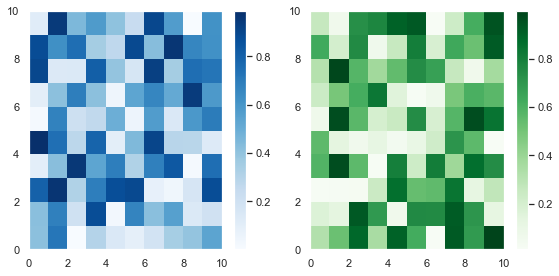

In [20]:
# Set seed so you can reproduce results
np.random.seed(1)

# Create a 10x10 array of random floats in the range [0.0, 1.0]
data1 = np.random.random((10, 10))
data2 = np.random.random((10, 10))

# Make figure twice as wide as it is long 
plt.figure(figsize=plt.figaspect(1/2))

# First subplot
plt.subplot(121)
pcm1 = plt.pcolormesh(data1, cmap='Blues')
plt.colorbar(pcm1)

# Second subplot
plt.subplot(122)
pcm2 = plt.pcolormesh(data2, cmap='Greens')
plt.colorbar(pcm2)

plt.tight_layout()
plt.show()

First, I created some `(10, 10)` arrays containing random numbers between 0 and 1 using the `np.random.random()` function. Then I plotted them as heatmaps using `plt.pcolormesh()`. I stored the result and passed it to `plt.colorbar()`, then finished the plot.

As this is an article on `Subplots`, I won't discuss the [matplotlib pcolormesh](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pcolormesh.html) function in detail. 

Since these plots are different samples of the same data, you can plot them with the same color and just draw one colorbar.

<div>
    <img src="Figures/1colorbar.png" align="left" />
</div>

To draw this plot, use the same code as above and set the same `colormap` in both [matplotlib pcolormesh](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pcolormesh.html) calls - `cmap='Blues'`. Then draw the colorbar on the second subplot.

This doesn't look as good as the above `Figure` since the colorbar takes up space from the second `Subplot`. Unfortunately, you cannot change this behavior - the colorbar takes up space from the `Subplot` it is drawn next to. 

It is possible to [draw colorbars over multiple `Subplots`](https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/colorbar_placement.html) but you need to use the `plt.subplots()` function.


## Matplotlib Subplot Grid

A `Grid` is the number of rows and columns you specify when calling `plt.subplot()`. Each section of the `Grid` is called a *cell*. You can create any sized grid you want. But `plt.subplot()` only creates `Subplots` that span one cell. To create `Subplots` that span multiple cells, use the [`GridSpec` class](https://matplotlib.org/api/_as_gen/matplotlib.gridspec.GridSpec.html#matplotlib.gridspec.GridSpec), the [`plt.subplots()` function](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots) or the [`subplot2grid`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot2grid.html#matplotlib.pyplot.subplot2grid) method.

I discuss these in detail in my article on matplotlib subplots. 

## Summary

Now you know everything there is to know about the subplot function in matplotlib. 

You can create grids of any size you want and draw subplots of any size - as long as it takes up `1/x`th of the plot. If you want a larger or smaller `Figure` you can change it with the `plt.figure()` function. Plus you can control the DPI, spacing and set the title. 

Armed with this knowlege, you can now make impressive plots of unlimited complexity. 

But you have also discovered some of the limits of the subplot function. And you may feel that it is a bit clunky to type `plt.subplot()` whenever you want to draw a new one. 

To learn how to create more detailed plots with less lines of code, read my article on the `plt.subplots()` (with an 's') function. 